In [19]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

tfd = tfp.distributions
tfpl = tfp.layers

In [2]:
pl = tfpl.IndependentNormal(event_shape=1)

In [3]:
inp = np.ones(shape=(10,2))
o = pl(inp)
o

2022-01-07 22:08:55.336543: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-07 22:08:55.336596: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-07 22:08:55.336630: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rlxlen): /proc/driver/nvidia/version does not exist
2022-01-07 22:08:55.337720: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-07 22:08:55.369972: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but t

<tfp.distributions._TensorCoercible 'tensor_coercible' batch_shape=[10] event_shape=[1] dtype=float32>

In [4]:
o.mean(), o.variance()

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[1.7246561],
        [1.7246561],
        [1.7246561],
        [1.7246561],
        [1.7246561],
        [1.7246561],
        [1.7246561],
        [1.7246561],
        [1.7246561],
        [1.7246561]], dtype=float32)>)

In [630]:
x = (np.random.random(100)*5).reshape(-1,1)
y = (x**2 + np.random.normal(loc=0, scale=.7*x+.5)).reshape(-1,1)

x = np.linspace(-1, 1, 2000)[:, np.newaxis]
y = np.power(x, 3) + 0.1*(2+x)*np.random.randn(len(x))[:, np.newaxis]


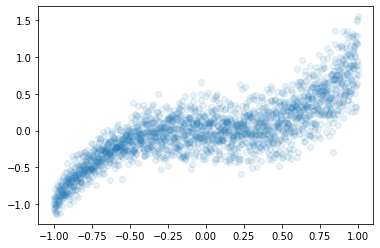

In [631]:
plt.scatter(x,y, alpha=.1)

In [632]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape=(1,), activation="tanh"),
        tf.keras.layers.Dense(2),
    ])
    return model

In [633]:
def normal_logprob(x, m, s):
    s = tf.math.softplus(s)
    return -0.5*((x-m)/s)**2 - tf.math.log(s) #- np.log(np.sqrt(2*np.pi)) + np.log(1) 

def neg_loglik(y_true, y_pred):
    return -normal_logprob(y_true, y_pred[:,:1], y_pred[:,1:2])

In [634]:
model = create_model()
model.compile(loss=neg_loglik, optimizer='adam')
model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 10)                20        
                                                                 
 dense_166 (Dense)           (None, 2)                 22        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [639]:
model.fit(x, y, epochs=1000, batch_size=len(x), verbose=0)


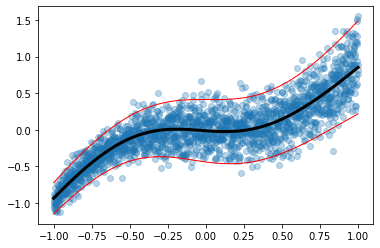

In [640]:
xr = np.linspace(np.min(x), np.max(x), 100)
y_pred = model.predict(xr)

s = 2*tf.math.softplus(y_pred[:,1])
m = y_pred[:,0]
plt.scatter(x,y, alpha=.3)
plt.plot(xr, m, color="black", lw=3)
plt.plot(xr, m+s, color="red", lw=1)
plt.plot(xr, m-s, color="red", lw=1)



In [609]:
tf.math.softplus(y_pred[:,1])

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.17428012, 0.1712015 , 0.16821663, 0.16532701, 0.162534  ,
       0.15983906, 0.15724373, 0.15474942, 0.15235765, 0.15007004,
       0.14788811, 0.14581352, 0.1438479 , 0.14199308, 0.14025073,
       0.13862272, 0.13711098, 0.1357175 , 0.1344443 , 0.13329352,
       0.13226734, 0.13136809, 0.13059817, 0.12995999, 0.12945607,
       0.12908907, 0.12886168, 0.12877652, 0.12883651, 0.12904435,
       0.1294029 , 0.12991492, 0.13058308, 0.13141009, 0.13239835,
       0.13355018, 0.13486767, 0.13635252, 0.13800612, 0.13982944,
       0.14182287, 0.14398623, 0.14631864, 0.14881854, 0.15148348,
       0.1543102 , 0.15729426, 0.16043045, 0.16371235, 0.16713251,
       0.1706824 , 0.17435233, 0.17813163, 0.18200855, 0.18597046,
       0.19000392, 0.19409463, 0.19822787, 0.20238839, 0.20656061,
       0.21072893, 0.21487777, 0.21899177, 0.22305597, 0.227056  ,
       0.23097806, 0.23480941, 0.23853812, 0.24215336, 0.24564546,
       0.24900